In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [11]:
data_df = pd.read_csv('datasets/territoires.csv', sep = ';')
data_df.head()

,CODGEO,LIBGEO,REG,DEP,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,...,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Geo Shape,geo_point_2d
0,95555,Saint-Gratien,11,95,20996.0,20258.0,2.42,1564.0,749.0,8909.817815,...,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.274621...","48.9695044801, 2.28470111182"
1,95488,Pierrelaye,11,95,8155.0,7920.0,9.21,639.0,243.0,2891.000000,...,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.193617...","49.0190794714, 2.1606870483"
2,95543,Saint-Cyr-en-Arthies,11,95,242.0,229.0,3.89,9.0,4.0,93.154812,...,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.732068...","49.058878265, 1.74176317637"
3,95523,La Roche-Guyon,11,95,446.0,447.0,4.61,18.0,21.0,186.507593,...,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.623323...","49.0883415268, 1.63442788467"
4,95678,Villiers-Adam,11,95,838.0,828.0,9.82,45.0,29.0,340.831981,...,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.236020...","49.0697597649, 2.23847351378"


In [13]:
data_df.isnull().sum()

CODGEO             0
LIBGEO             0
REG                0
DEP                0
P14_POP            3
P09_POP            3
SUPERF             3
NAIS0914           3
DECE0914           3
P14_MEN            3
NAISD16            4
DECESD16           4
P14_LOG            3
P14_RP             3
P14_RSECOCC        3
P14_LOGVAC         3
P14_RP_PROP        3
NBMENFISC14       20
PIMP14           739
MED14             20
TP6014           838
P14_EMPLT          3
P14_EMPLT_SAL      3
P09_EMPLT          0
P14_POP1564        3
P14_CHOM1564       3
P14_ACT1564        3
ETTOT15            1
ETAZ15             1
ETBE15             1
ETFZ15             1
ETGU15             1
ETGZ15             1
ETOQ15             1
ETTEF115           1
ETTEFP1015         1
Geo Shape          3
geo_point_2d       3
dtype: int64

In [24]:
data_df['PIMP14'].fillna(data_df['PIMP14'].mean(), inplace = True)
data_df['TP6014'].fillna(data_df['TP6014'].mean(),inplace = True)
data_df.isnull().sum()

CODGEO            0
LIBGEO            0
REG               0
DEP               0
P14_POP           3
P09_POP           3
SUPERF            3
NAIS0914          3
DECE0914          3
P14_MEN           3
NAISD16           4
DECESD16          4
P14_LOG           3
P14_RP            3
P14_RSECOCC       3
P14_LOGVAC        3
P14_RP_PROP       3
NBMENFISC14      20
PIMP14            0
MED14            20
TP6014            0
P14_EMPLT         3
P14_EMPLT_SAL     3
P09_EMPLT         0
P14_POP1564       3
P14_CHOM1564      3
P14_ACT1564       3
ETTOT15           1
ETAZ15            1
ETBE15            1
ETFZ15            1
ETGU15            1
ETGZ15            1
ETOQ15            1
ETTEF115          1
ETTEFP1015        1
Geo Shape         3
geo_point_2d      3
dtype: int64

In [22]:
clean_data = data_df.dropna()
clean_data.isnull().sum()

CODGEO           0
LIBGEO           0
REG              0
DEP              0
P14_POP          0
P09_POP          0
SUPERF           0
NAIS0914         0
DECE0914         0
P14_MEN          0
NAISD16          0
DECESD16         0
P14_LOG          0
P14_RP           0
P14_RSECOCC      0
P14_LOGVAC       0
P14_RP_PROP      0
NBMENFISC14      0
PIMP14           0
MED14            0
TP6014           0
P14_EMPLT        0
P14_EMPLT_SAL    0
P09_EMPLT        0
P14_POP1564      0
P14_CHOM1564     0
P14_ACT1564      0
ETTOT15          0
ETAZ15           0
ETBE15           0
ETFZ15           0
ETGU15           0
ETGZ15           0
ETOQ15           0
ETTEF115         0
ETTEFP1015       0
Geo Shape        0
geo_point_2d     0
dtype: int64

In [48]:
X = clean_data.iloc[:,4:-2]
y = clean_data.iloc[:,1]
X

,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,NAISD16,DECESD16,P14_LOG,P14_RP,...,P14_ACT1564,ETTOT15,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015
0,20996.0,20258.0,2.42,1564.0,749.0,8909.817815,257.0,156.0,9337.392497,8909.817815,...,10146.844242,1475.0,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0
1,8155.0,7920.0,9.21,639.0,243.0,2891.000000,152.0,46.0,3086.000000,2891.000000,...,4044.000000,878.0,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0
2,242.0,229.0,3.89,9.0,4.0,93.154812,1.0,1.0,106.271929,93.154812,...,109.355649,13.0,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0
3,446.0,447.0,4.61,18.0,21.0,186.507593,0.0,6.0,267.570530,186.507593,...,204.811694,74.0,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0
4,838.0,828.0,9.82,45.0,29.0,340.831981,5.0,9.0,364.250976,340.831981,...,400.064890,75.0,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,26826.0,25856.0,4.78,2111.0,753.0,10363.061937,366.0,149.0,11028.844943,10363.061937,...,13742.201794,1948.0,3.0,60.0,273.0,1365.0,297.0,247.0,419.0,86.0
1296,15072.0,14783.0,5.24,910.0,551.0,6033.502470,197.0,97.0,6358.662532,6033.502470,...,7400.243545,1396.0,3.0,71.0,199.0,876.0,177.0,247.0,301.0,45.0
1297,177.0,176.0,3.26,14.0,3.0,70.000000,5.0,1.0,88.000000,70.000000,...,98.000000,25.0,5.0,3.0,6.0,9.0,3.0,2.0,9.0,0.0
1298,278.0,259.0,7.58,17.0,5.0,109.978022,6.0,1.0,122.384802,109.978022,...,139.509158,41.0,5.0,1.0,1.0,31.0,10.0,3.0,10.0,2.0


### Normalisation avec StandardScaler()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_transfered = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X_transfered,columns=X.columns[0:])

### PCA

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

#### Critère de coude

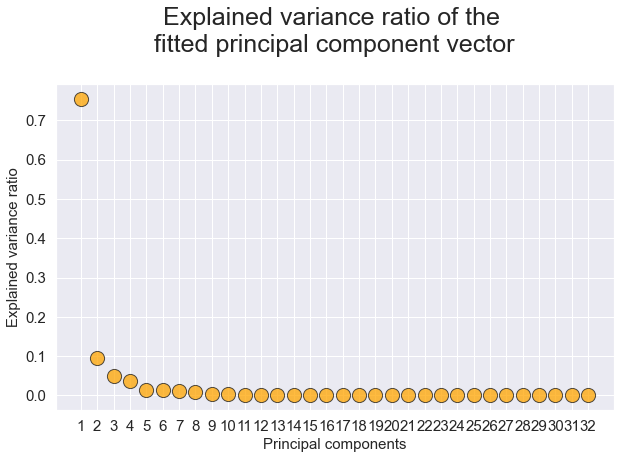

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [42]:
variance_cum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
variance_cum

array([75.42, 84.9 , 89.96, 93.7 , 95.09, 96.41, 97.46, 98.41, 98.84,
       99.11, 99.3 , 99.48, 99.61, 99.72, 99.79, 99.84, 99.88, 99.91,
       99.94, 99.95, 99.96, 99.97, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98])

## Visualisation des instances

#### Construction du jeu de données transformées

In [44]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)

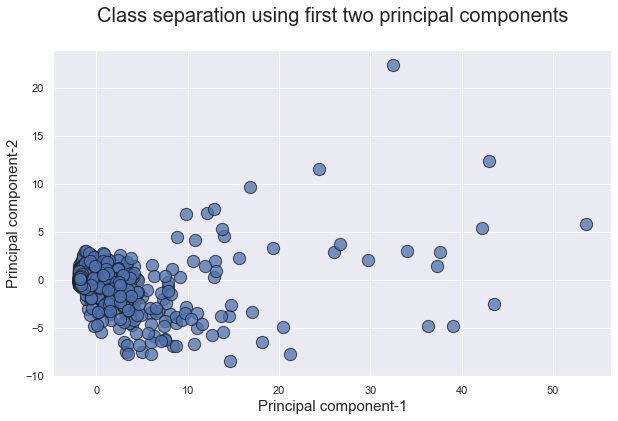

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)

'''for etiquette, x1, x2 in zip(y, dfx_trans[:, 0], dfx_trans[:, 1]):
    plt.annotate(etiquette, xy=(x1, x2))'''
    
plt.show()

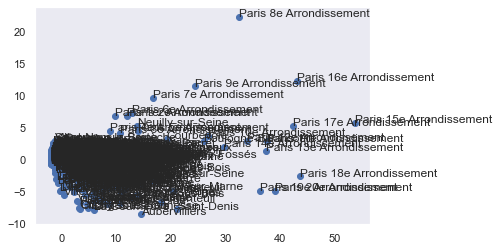

In [69]:
plt.scatter(X_train[:, 0], X_train[:, 1])
for etiquette, x1, x2 in zip(y, X_train[:, 0], X_train[:, 1]):
    plt.annotate(etiquette, xy=(x1, x2))

plt.grid()
plt.show()

## Kmeans

In [53]:
from sklearn.cluster import KMeans

X_train = dfx_trans.iloc[:,[0,1]].values

In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Score Inerties et Sihlouette

In [55]:
from sklearn import metrics

inerties=[]
silhouette = []
# on fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 10):
    # pour chaque k, on crée un modèle et on l’ajuste
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_train)
    # on stocke l’inertie associée
    inerties.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(X_train, y_pred, metric='euclidean'))

#### plot Inerties

Text(0.5, 1.0, 'Inertie vs nombre de classes')

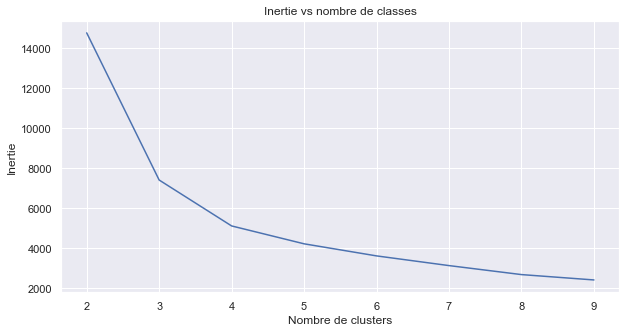

In [57]:
fig=plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), inerties)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title('Inertie vs nombre de classes')

#### Plot Sihlouette

Text(0.5, 1.0, 'silhouette vs nombre de classes')

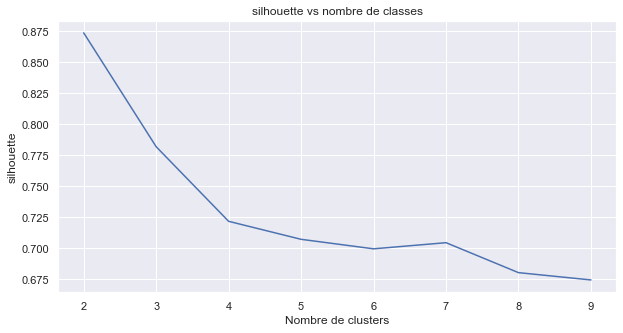

In [58]:
fig=plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette)
plt.xlabel("Nombre de clusters")
plt.ylabel("silhouette")
plt.title('silhouette vs nombre de classes')

#### Visualisation

In [59]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)
y_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

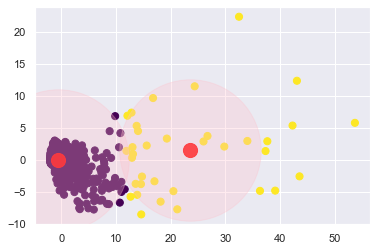

In [61]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, s=50, cmap='viridis')
centres = kmeans.cluster_centers_
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=200, alpha=0.9)
plt.scatter(centres[:, 0], centres[:, 1], c='pink', s=20000, alpha=0.3)

## CAH

In [62]:
from sklearn.cluster import KMeans,AgglomerativeClustering

silhouette = []
for k in range(2, 10):
    # pour chaque k, on crée un modèle et on l’ajuste
  
    y_pred = AgglomerativeClustering(n_clusters=k).fit_predict(X)
    
    silhouette.append(metrics.silhouette_score(X, y_pred, metric='euclidean'))

#### Score silouette

Text(0.5, 1.0, 'silhouette vs nombre de classes')

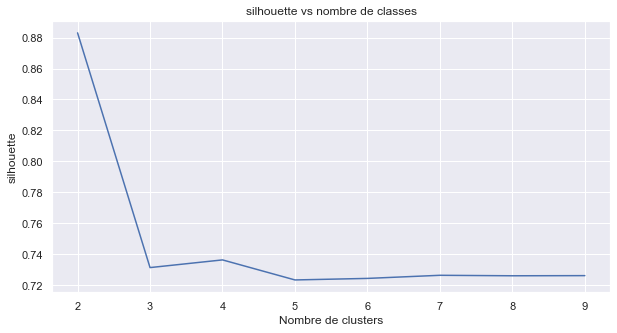

In [63]:
fig=plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette)
plt.xlabel("Nombre de clusters")
plt.ylabel("silhouette")
plt.title('silhouette vs nombre de classes')

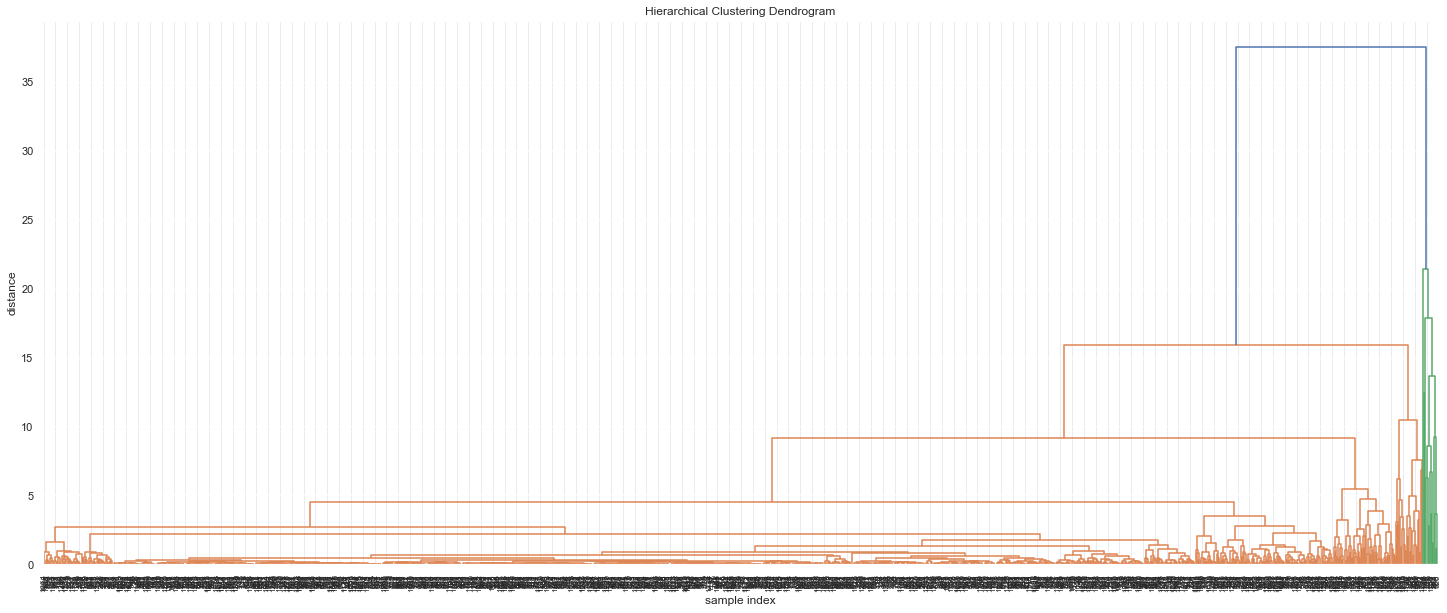

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_train, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

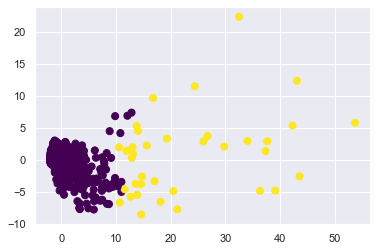

In [64]:
cha= AgglomerativeClustering(n_clusters=2).fit(X)
plt.scatter(X_train[:, 0], X_train[:, 1], c=cha.labels_, s=50, cmap='viridis')